In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [400]:
df=pd.read_csv('diamonds.csv')

In [401]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [402]:
df.shape

(53940, 10)

In [403]:
df=df.drop_duplicates()
df.shape

(53794, 10)

In [404]:
df.reset_index(drop=True,inplace=True)

In [405]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [406]:
df.info(),df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


(None,
 float64    6
 object     3
 int64      1
 dtype: int64)

In [407]:
df.describe()

carat         depth         table         price             x  \
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.79778     61.748080     57.458109   3933.065082      5.731214   
std        0.47339      1.429909      2.233679   3988.114460      1.120695   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    951.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000     62.500000     59.000000   5326.750000      6.540000   
max        5.01000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.734653      3.538714  
std        1.141209      0.705037  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

In [408]:
df[(df['x']==0)|(df['y']==0)|(df['z']==0)].index

Int64Index([ 2201,  2308,  4778,  5457, 10145, 11156, 11935, 13570, 15914,
            24338, 24464, 26063, 26183, 27047, 27364, 27438, 27672, 49413,
            51361],
           dtype='int64')

In [409]:
df.loc[df["x"] == 0, "x"] = np.nan 
df.loc[df["y"] == 0, "y"] = np.nan 
df.loc[df["z"] == 0, "z"] = np.nan 
df[["x", "y", "z"]].isnull().sum()

x     7
y     6
z    19
dtype: int64

In [410]:
#dropping rows having all nan in x,y,z columns
df = df.dropna(subset=['x', 'y','z'], how='all')

In [411]:
df[df["z"].isna()][['x','z']]

x   z
2201   6.55 NaN
2308   6.66 NaN
4778   6.50 NaN
5457   6.50 NaN
10145  7.15 NaN
11156   NaN NaN
13570  6.88 NaN
24338  8.49 NaN
26063  8.52 NaN
27047  8.42 NaN
27438  8.02 NaN
27672  8.90 NaN
51361  6.71 NaN

In [412]:
df = df.dropna(subset=['x','z'], how='all')

In [413]:
df.reset_index(drop=True,inplace=True)

In [414]:
df[df["z"].isna()]

carat      cut color clarity  depth  table  price     x     y   z
2201    1.00  Premium     G     SI2   59.1   59.0   3142  6.55  6.48 NaN
2308    1.01  Premium     H      I1   58.1   59.0   3167  6.66  6.60 NaN
4778    1.10  Premium     G     SI2   63.0   59.0   3696  6.50  6.47 NaN
5457    1.01  Premium     F     SI2   59.2   58.0   3837  6.50  6.47 NaN
10145   1.50     Good     G      I1   64.0   61.0   4731  7.15  7.04 NaN
13568   1.15    Ideal     G     VS2   59.2   56.0   5564  6.88  6.83 NaN
24335   2.18  Premium     H     SI2   59.4   61.0  12631  8.49  8.45 NaN
26059   2.25  Premium     I     SI1   61.3   58.0  15397  8.52  8.42 NaN
27042   2.20  Premium     H     SI1   61.2   59.0  17265  8.42  8.37 NaN
27432   2.02  Premium     H     VS2   62.7   53.0  18207  8.02  7.95 NaN
27666   2.80     Good     G     SI2   63.8   58.0  18788  8.90  8.85 NaN
51354   1.12  Premium     G      I1   60.4   59.0   2383  6.71  6.67 NaN

In [415]:
# as corresponding x values for which z are nan are approx to 85th percentile
df["z"]=df["z"].fillna(df["z"].quantile(0.85))

In [416]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
categorical_feats = df.dtypes[df.dtypes == 'object'].index
print("SKEW:")
print(df[numerical_feats].skew())

SKEW:
carat    1.113764
depth   -0.113860
table    0.791656
price    1.618367
x        0.397038
y        2.468583
z        1.588481
dtype: float64


In [417]:
print("KURTOSIS:")
print(df[numerical_feats].kurt()) 

KURTOSIS:
carat     1.247580
depth     5.414469
table     2.773986
price     2.179320
x        -0.703828
y        92.201173
z        48.021669
dtype: float64


In [418]:
# sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True)

In [419]:
X=df.drop('price',axis=1)
# X=df.loc[:, df.columns != 'price']
y=df['price']

In [420]:
for i in X.select_dtypes(include=['int64','float64']): 
      X[i] = pd.Series(stats.boxcox(X[i])[0])
    

In [421]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [422]:
num_train=X_train.drop(['cut','color','clarity'],axis=1)
num_train

carat       depth    table         x         y         z
1104  -0.163759  703.025439  0.24289  1.389857  1.321242  1.090415
18263  0.404280  675.921426  0.24289  1.492006  1.423327  1.200260
13658  0.009946  701.074672  0.24289  1.428688  1.356893  1.134681
2169  -0.225485  724.633253  0.24289  1.374485  1.309775  1.085052
44186 -1.168090  654.938934  0.24289  1.206245  1.165842  0.854669
...         ...         ...      ...       ...       ...       ...
28017 -1.237634  716.744219  0.24289  1.181762  1.135442  0.860147
50496 -1.237634  726.611153  0.24289  1.175819  1.136809  0.862866
29199 -1.237634  706.933773  0.24289  1.187635  1.139531  0.860147
40061 -0.929770  685.550254  0.24289  1.245342  1.201312  0.919586
17673 -1.274270  782.904063  0.24289  1.160639  1.121527  0.876270

[40340 rows x 6 columns]

In [423]:
# # Clipping Numerical columns to roundoff extreme outliers to given quantiles such that no skew>1 os observed.
# for i in num_train.columns:
#     lower_limit = -np.std(num_train[i])
#     upper_limit = np.std(num_train[i])
#     num_train[i] = np.where(num_train[i] <lower_limit, lower_limit,num_train[i])
#     num_train[i] = np.where(num_train[i] >upper_limit, upper_limit,num_train[i])
#     if np.abs(num_train[i].skew()) > 1:
#         print(i,":",num_train[i].skew())

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


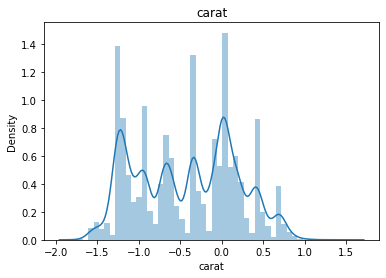

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


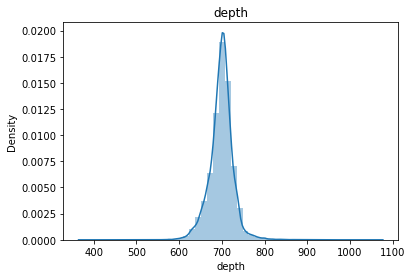

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


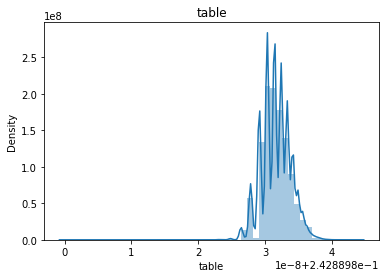

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


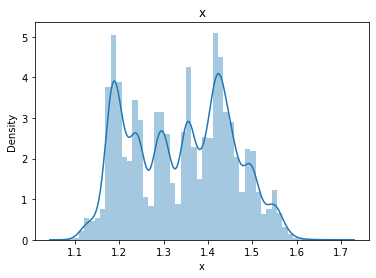

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


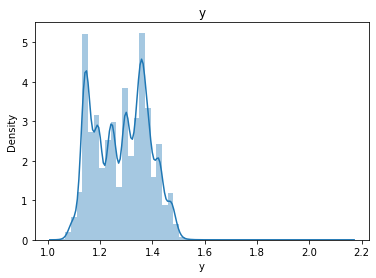

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


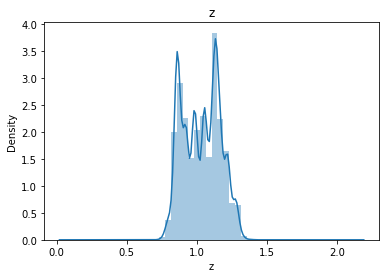

In [424]:
# df.select_dtypes(include=['int64','float64']) return column names of 'int64','float64' data types from df
#probability distribution shapes
for i in num_train:#df.select_dtypes(include=['int64','float64']):
    sns.distplot(num_train[i])
    plt.title(i)
    plt.show()

In [425]:
scaler=StandardScaler()
# Column names are lost after scaling 
# DatFrame isconverted to a numpy ndarray
num_train_rescaled=pd.DataFrame(scaler.fit_transform(num_train),columns=num_train.columns,index=num_train.index)
num_train_rescaled.head()

carat     depth     table         x         y         z
1104   0.424003  0.166364 -0.115419  0.446365  0.382663  0.435758
18263  1.363573 -0.809645  1.227269  1.342695  1.375074  1.264272
13658  0.711320  0.096117 -0.619401  0.787095  0.729239  0.769636
2169   0.321904  0.944456 -0.115419  0.311480  0.271188  0.395300
44186 -1.237222 -1.565219  1.153817 -1.164784 -1.128057 -1.342382

In [426]:
cat_train=X_train[['cut','color','clarity']]
cat_train

cut color clarity
1104       Ideal     G     SI2
18263  Very Good     I     SI2
13658    Premium     F     SI1
2169   Very Good     D     VS2
44186    Premium     I     VS1
...          ...   ...     ...
28017    Premium     F     SI1
50496       Good     H     VS1
29199    Premium     I    VVS2
40061      Ideal     G     VS1
17673       Good     F    VVS2

[40340 rows x 3 columns]

In [427]:
cut={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color={'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [428]:
cat_train['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5, 4, 3, 2, 1], inplace= True)
cat_train['color']=cat_train['color'].apply(lambda x:color[x])
cat_train['clarity']=cat_train['clarity'].apply(lambda x:clarity[x])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-428-ba8cccd99b0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_train['color']=cat_train['color'].apply(lambda x:color[x])
<ipython-input-428-ba8cccd99b0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [429]:
pro_X_train_df=pd.concat([num_train_rescaled,cat_train],axis=1)
pro_X_train_df

carat     depth     table         x         y         z  cut  color  \
1104   0.424003  0.166364 -0.115419  0.446365  0.382663  0.435758    5      4   
18263  1.363573 -0.809645  1.227269  1.342695  1.375074  1.264272    3      2   
13658  0.711320  0.096117 -0.619401  0.787095  0.729239  0.769636    4      5   
2169   0.321904  0.944456 -0.115419  0.311480  0.271188  0.395300    3      7   
44186 -1.237222 -1.565219  1.153817 -1.164784 -1.128057 -1.342382    4      2   
...         ...       ...       ...       ...       ...       ...  ...    ...   
28017 -1.352251  0.660373  0.345282 -1.379608 -1.423589 -1.301062    4      5   
50496 -1.352251  1.015679 -0.115419 -1.431758 -1.410297 -1.280551    2      3   
29199 -1.352251  0.307102 -0.115419 -1.328082 -1.383837 -1.301062    4      2   
40061 -0.843026 -0.462913 -1.171614 -0.821716 -0.783234 -0.852739    5      4   
17673 -1.412849  3.042772 -1.171614 -1.564959 -1.558862 -1.179450    2      5   

       clarity  
1104         2  
18263        2  
13658        3  
2169         4  
44186        5  
...        ...  
28017        3  
50496        5  
29199        6  
40061        5  
17673        6  

[40340 rows x 9 columns]

In [430]:
# Test Data Preprocessing

In [431]:
num_test=X_test.drop(['cut','color','clarity'],axis=1)
num_test

carat       depth    table         x         y         z
29886 -1.312266  685.550254  0.24289  1.171314  1.132694  0.832213
1062  -1.237634  679.766121  0.24289  1.194877  1.143581  0.849137
12693  0.019784  687.482851  0.24289  1.428688  1.359259  1.128118
21480  0.058111  703.025439  0.24289  1.425219  1.363947  1.137931
484   -0.319381  706.933773  0.24289  1.357549  1.290505  1.053556
...         ...         ...      ...       ...       ...       ...
30515 -1.274270  668.259419  0.24289  1.187635  1.147595  0.840738
42370 -0.716074  699.126172  0.24289  1.282663  1.232912  0.968790
9850   0.000000  666.349628  0.24289  1.417309  1.356101  1.107900
46337 -0.614841  704.978473  0.24289  1.301414  1.249930  0.992888
49913 -0.595804  687.482851  0.24289  1.308254  1.258178  0.992888

[13447 rows x 6 columns]

In [432]:
# # Clipping Numerical columns to roundoff extreme outliers to given quantiles such that no skew>1 os observed.
# for i in num_test.columns:
#     lower_limit = -np.std(num_test[i])
#     upper_limit = np.std(num_test[i])
#     num_test[i] = np.where(num_test[i] <lower_limit, lower_limit,num_test[i])
#     num_test[i] = np.where(num_test[i] >upper_limit, upper_limit,num_test[i])
#     if np.abs(num_test[i].skew()) > 1:
#         print(i,":",num_test[i].skew())

In [433]:
scaler=StandardScaler()
# Column names are lost after scaling 
# DatFrame isconverted to a numpy ndarray
num_test_rescaled=pd.DataFrame(scaler.fit_transform(num_test),columns=num_test.columns,index=num_test.index)
num_test_rescaled.head()

carat     depth     table         x         y         z
29886 -1.473555 -0.452346 -0.123380 -1.470747 -1.451995 -1.512103
1062  -1.350956 -0.659651  1.147631 -1.265239 -1.346639 -1.385040
12693  0.714617 -0.383081 -0.628067  0.774006  0.740444  0.709478
21480  0.777576  0.173971 -0.123380  0.743745  0.785808  0.783153
484    0.157466  0.314047  0.760346  0.153548  0.075120  0.149686

In [434]:
cat_test=X_test[['cut','color','clarity']]
cat_test

cut color clarity
29886      Ideal     F    VVS1
1062     Premium     I     VS2
12693      Ideal     H     VS2
21480      Ideal     D     VS1
484      Premium     E     SI1
...          ...   ...     ...
30515      Ideal     D     SI2
42370      Ideal     I    VVS2
9850        Good     F     SI1
46337  Very Good     F     VS2
49913      Ideal     F    VVS2

[13447 rows x 3 columns]

In [435]:
cut={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
color={'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [436]:
cat_test['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], [5, 4, 3, 2, 1], inplace= True)
cat_test['color']=cat_test['color'].apply(lambda x:color[x])
cat_test['clarity']=cat_test['clarity'].apply(lambda x:clarity[x])

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-436-3d927f120778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_test['color']=cat_test['color'].apply(lambda x:color[x])
<ipython-input-436-3d927f120778>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [437]:
pro_X_test_df=pd.concat([num_test_rescaled,cat_test],axis=1)
pro_X_test_df

carat     depth     table         x         y         z  cut  color  \
29886 -1.473555 -0.452346 -0.123380 -1.470747 -1.451995 -1.512103    5      5   
1062  -1.350956 -0.659651  1.147631 -1.265239 -1.346639 -1.385040    4      2   
12693  0.714617 -0.383081 -0.628067  0.774006  0.740444  0.709478    5      3   
21480  0.777576  0.173971 -0.123380  0.743745  0.785808  0.783153    5      7   
484    0.157466  0.314047  0.760346  0.153548  0.075120  0.149686    4      6   
...         ...       ...       ...       ...       ...       ...  ...    ...   
30515 -1.411138 -1.072056 -0.628067 -1.328404 -1.307805 -1.448101    5      7   
42370 -0.494185  0.034220 -0.123380 -0.499585 -0.482202 -0.486718    5      2   
9850   0.682117 -1.140504  2.665209  0.674759  0.709883  0.557688    2      5   
46337 -0.327889  0.243969 -0.953718 -0.336047 -0.317518 -0.305796    3      5   
49913 -0.296616 -0.383081 -0.123380 -0.276388 -0.237705 -0.305796    5      5   

       clarity  
29886        7  
1062         4  
12693        4  
21480        5  
484          3  
...        ...  
30515        2  
42370        6  
9850         3  
46337        4  
49913        6  

[13447 rows x 9 columns]

In [438]:
# KNN

In [439]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(pro_X_train_df, y_train)

KNeighborsRegressor()

In [440]:
#to check for bias finding train accuracy
y_train_pred=regressor.predict(pro_X_train_df)

In [441]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
temp_df.head()

Actual  Predicted
1104     2913     2972.8
18263    7441     6772.4
13658    5599     4813.0
2169     3135     3632.0
44186     521      590.8

In [442]:
print('Mean Absolute Error: ', mean_absolute_error(y_train, y_train_pred))
print('Mean Squared Error: ', mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train Accuracy of algorithm model: ',r2_score(y_train, y_train_pred))

Mean Absolute Error:  332.3514625681706
Mean Squared Error:  418183.4239504214
Root Mean Squared Error:  646.6710322493357
Train Accuracy of algorithm model:  0.9734960464212723


In [443]:
print("Adjusted R^2:",1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Adjusted R^2: 0.9734901318271189


In [444]:
actual   = np.array(y_train)
forecast = np.array(y_train_pred)
# Consider a list APE to store the APE value for each of the records in dataset
APE = []
# Iterate over the list values
for i in range(len(actual)):
    # Calculate percentage error
    per_err = (actual[i] - forecast[i]) / actual[i]
    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)
    # Append it to the APE list
    APE.append(per_err)
MAPE = sum(APE)/len(APE)
MAPE

0.08656428507294735

In [445]:
# Test data metrics

In [446]:
y_test_pred = regressor.predict(pro_X_test_df)

In [447]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

Actual  Predicted
29886     715      870.8
1062      558      569.4
12693    5312     5955.4
21480    9625     9479.6
484      2821     2631.4

In [448]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('test Accuracy of algorithm model: ',r2_score(y_test, y_test_pred))

Mean Absolute Error:  423.94123596341194
Mean Squared Error:  702587.4095723954
Root Mean Squared Error:  838.2048732692953
test Accuracy of algorithm model:  0.9567868358448997


In [449]:
print("Adjusted R^2:",1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R^2: 0.9567578919975084


In [450]:
actual   = np.array(y_test)
forecast = np.array(y_test_pred)
# Consider a list APE to store the APE value for each of the records in dataset
APE = []
# Iterate over the list values
for i in range(len(actual)):
    # Calculate percentage error
    per_err = (actual[i] - forecast[i]) / actual[i]
    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)
    # Append it to the APE list
    APE.append(per_err)
MAPE = sum(APE)/len(APE)
MAPE

0.10653783293995785